<a href="https://colab.research.google.com/github/zubinsharma17/Ml-Projects/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('survey lung cancer.csv')
main_df = pd.DataFrame(data)
df= main_df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

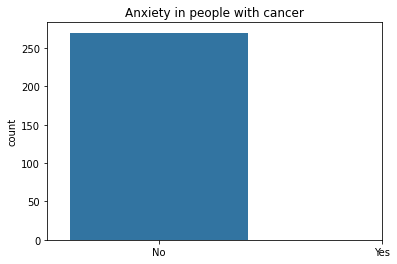

YES = 142
NO = 128


In [7]:
df_lung_cancer = df[df["LUNG_CANCER"]=='YES']
sns.countplot(df_lung_cancer["ANXIETY"])
plt.title("Anxiety in people with cancer")
plt.xticks([0, 1], ('No', 'Yes'))
plt.show()
print("YES = 142")
print("NO = 128")

In [8]:
df.shape

(309, 16)

In [9]:
df.describe

<bound method NDFrame.describe of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1  

<Axes: ylabel='count'>

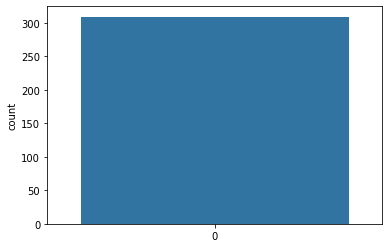

In [10]:
sns.countplot(df["SMOKING"])

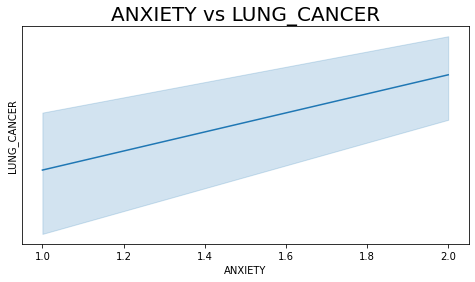

In [11]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df["ANXIETY"], y=df["LUNG_CANCER"])
plt.title("ANXIETY vs LUNG_CANCER", size=20)
plt.show()

Converting Categorical Value To Numericals.

In [12]:
colum_cat = ['GENDER','LUNG_CANCER']
for i in colum_cat:
    print('-------------------------')
    print(df[i].value_counts())
    print('-------------------------')

-------------------------
M    162
F    147
Name: GENDER, dtype: int64
-------------------------
-------------------------
YES    270
NO      39
Name: LUNG_CANCER, dtype: int64
-------------------------


In [13]:
df_clean = df.copy()
for i in colum_cat:
    print(f'Catagory of {i}')
    catlist = df_clean[i].unique()
    for j, val in enumerate(catlist):
         dftobjfinal = df_clean[i].replace({val:j},inplace=True)
         #print(dftobjfinal)
         print(j,val)
    print('--------------------------------')

Catagory of GENDER
0 M
1 F
--------------------------------
Catagory of LUNG_CANCER
0 YES
1 NO
--------------------------------


In [14]:
df_clean

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,0
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,0
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,0
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,0


Visualization Of Data.

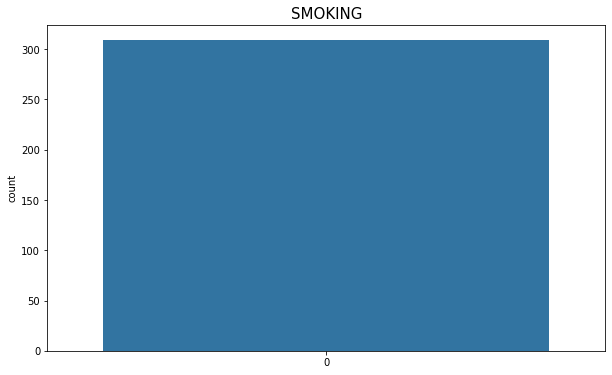

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(df["SMOKING"])
plt.title("SMOKING", size=15)
plt.show()

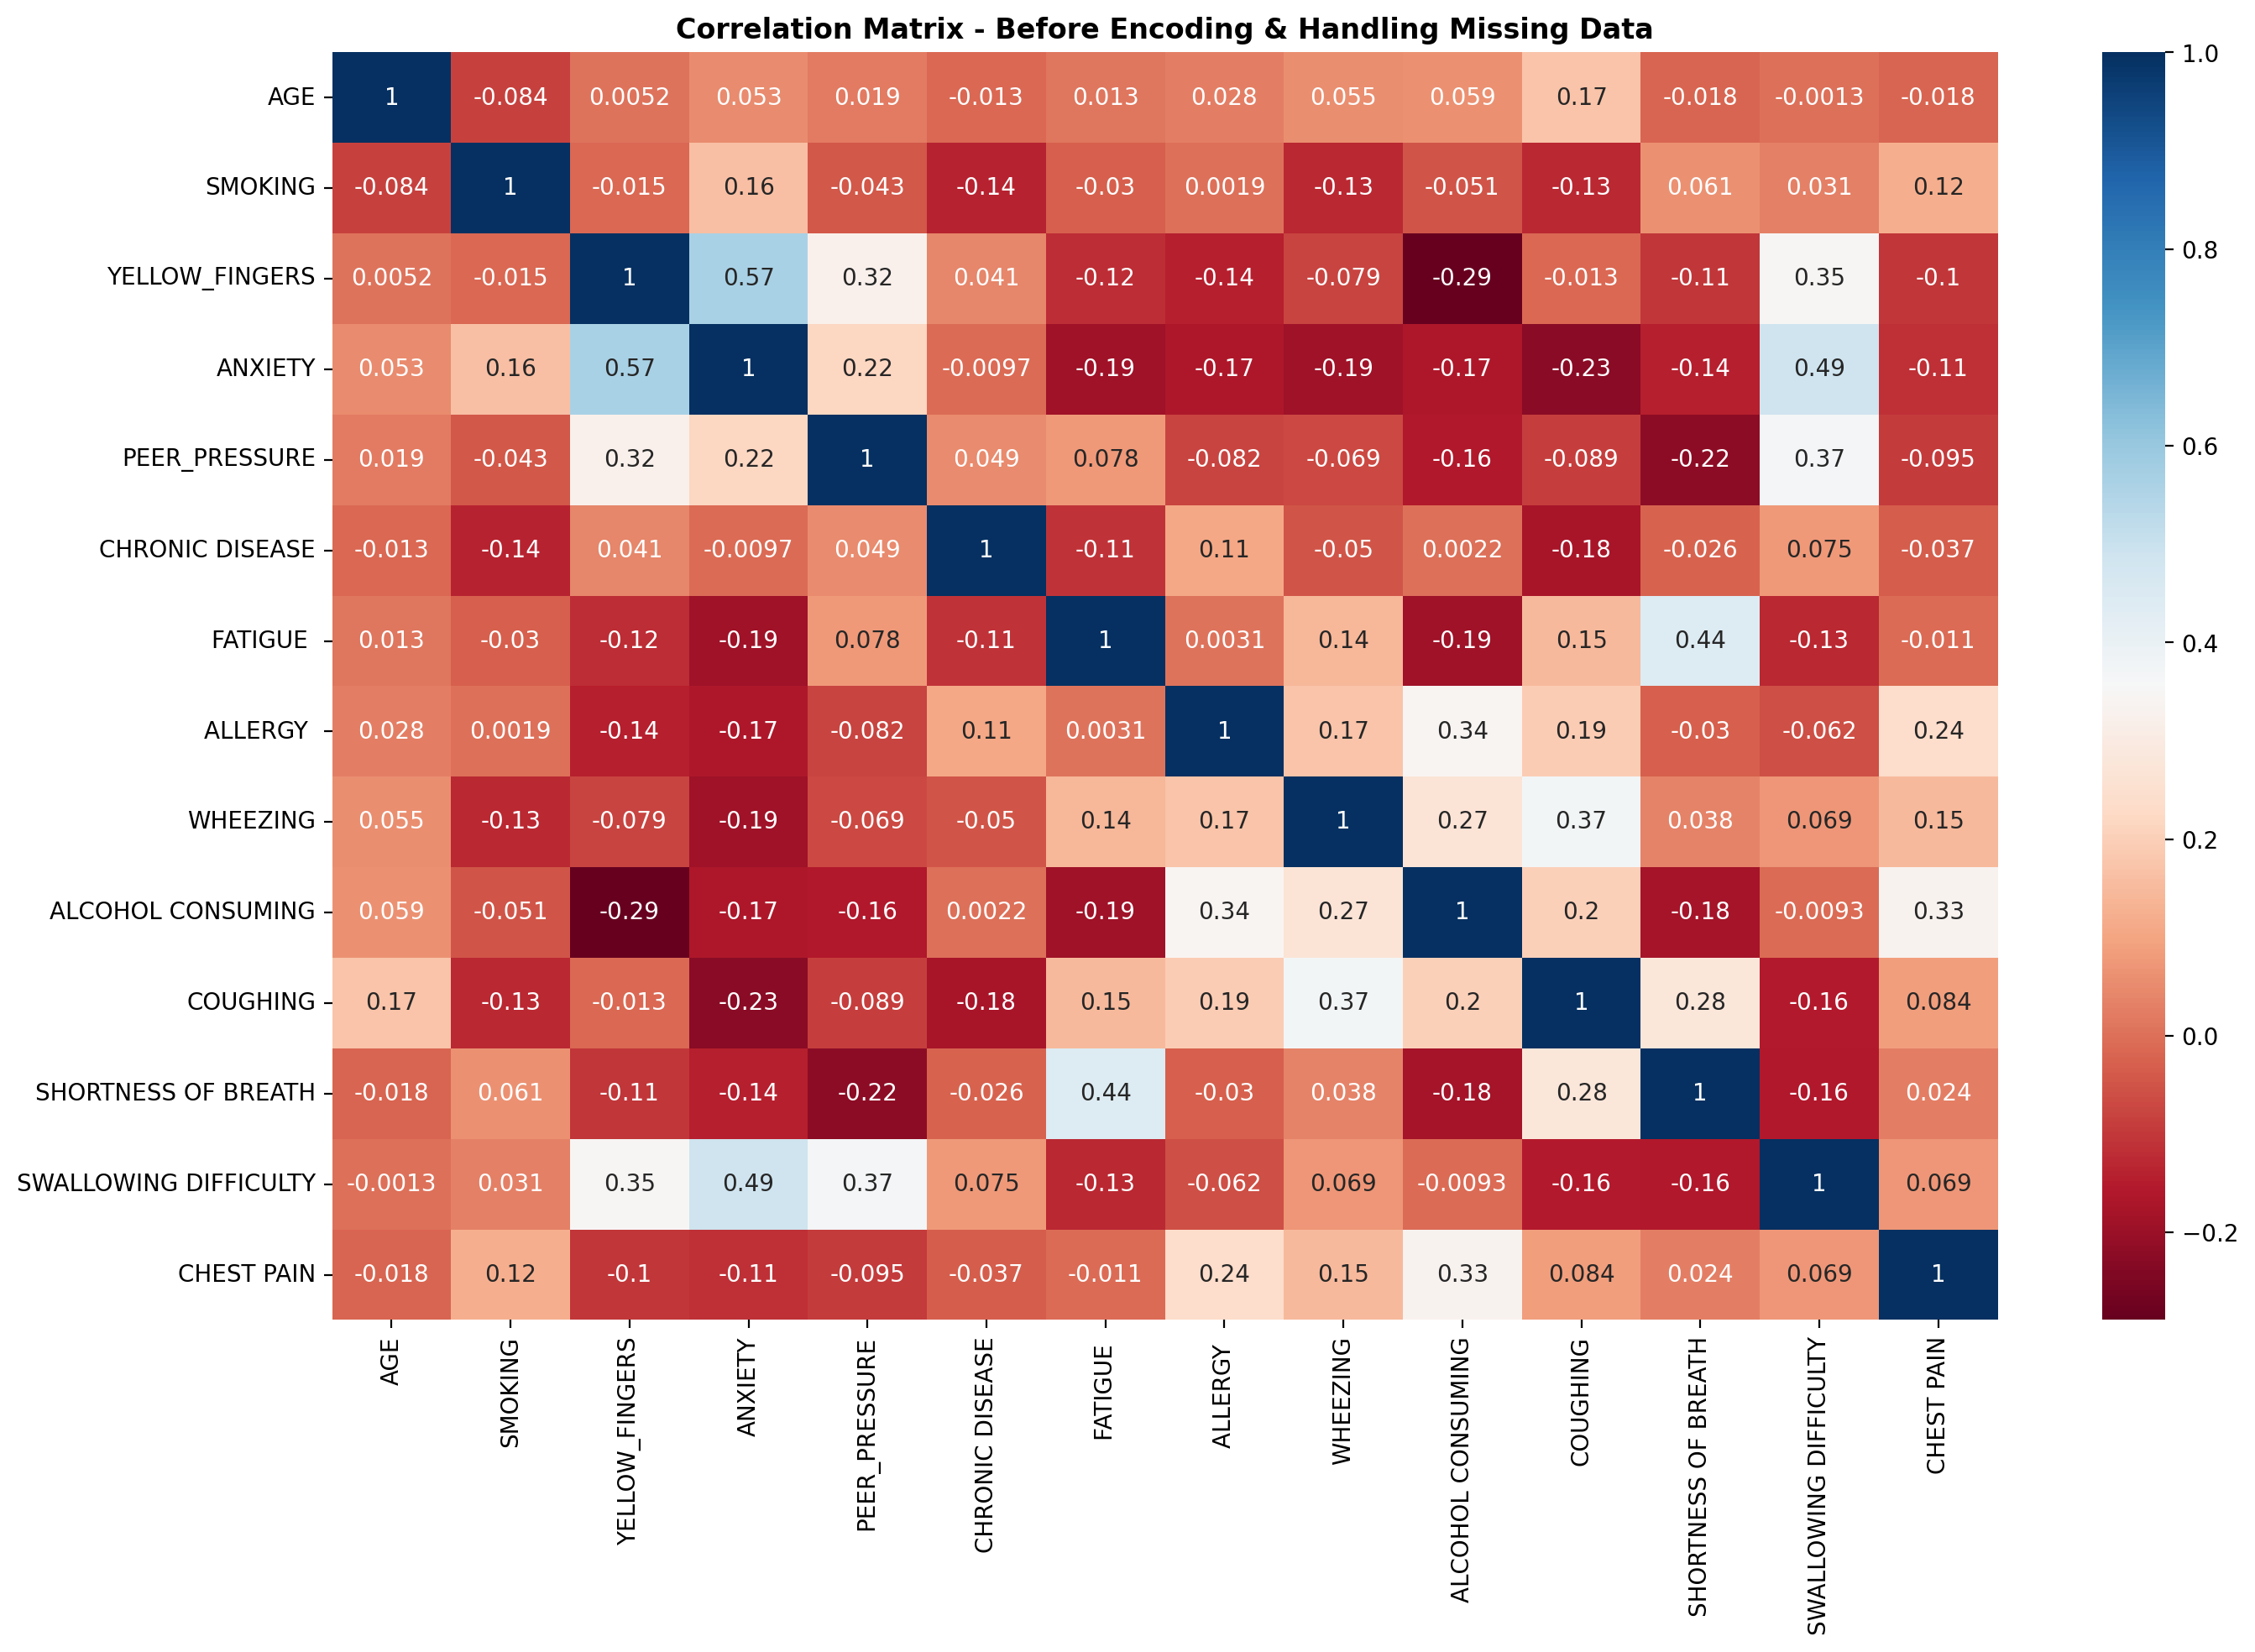

In [16]:
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(df.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix - Before Encoding & Handling Missing Data', weight='bold')
plt.show()

Outliners For Model.

In [17]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df_clean)

In [18]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [19]:
len(outlier_index)

6

In [20]:
df_clean = df.copy()

In [21]:
g = df_clean.groupby('LUNG_CANCER')
df_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df_balanced = df_balanced.reset_index(drop=True)
x = df_balanced[['SMOKING','PEER_PRESSURE','ALCOHOL CONSUMING']]
y = df_balanced['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

In [22]:
x

,SMOKING,PEER_PRESSURE,ALCOHOL CONSUMING
0,1,1,1
1,2,1,1
2,1,2,1
3,2,1,1
4,2,1,1
...,...,...,...
73,2,2,2
74,2,1,1
75,2,2,1
76,1,2,2


In [23]:
y


0     0
1     0
2     0
3     0
4     0
     ..
73    1
74    1
75    1
76    1
77    1
Name: LUNG_CANCER, Length: 78, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 42, shuffle=True)

Applying Linear Regression.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

predictions=logmodel.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.60      0.56      0.58        16

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.59      0.59      0.59        32



Deep Learning.

In [26]:
from tensorflow.keras.layers import Conv1D, Dense, Input, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Sequential


model_cnn = Sequential()

#model_cnn.add(Conv1D(32, kernel_size=3, padding='same', activation='relu', input_shape=(16, 1)))
#model_cnn.add(MaxPooling1D(pool_size=2))

#model_cnn.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
#model_cnn.add(MaxPooling1D(pool_size=2))

#model_cnn.add(Conv1D(32, kernel_size=3, padding='same', activation='relu'))
#model_cnn.add(MaxPooling1D(pool_size=2))

#model_cnn.add(Dropout(0.25))
#model_cnn.add(Flatten())
#model_cnn.add(Dense(16, activation='relu'))

#model_cnn.add(Dense(5, activation='softmax'))

model_cnn.add(Dense(3, activation='relu'))
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

#model_cnn.build(input_shape=[3])

In [27]:
import tensorflow as tf
from tensorflow import keras
#es=tf.keras.callbacks.EarlyStopping(
#    min_delta=0.001,
#    patience=10,
#    restore_best_weights=True
#)
h_cnn = model_cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)
model_cnn.summary()

Epoch 1/20
2/2 [==============================] - 2s 396ms/step - loss: 0.6860 - accuracy: 0.6739 - val_loss: 0.7077 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 0.6851 - accuracy: 0.5870 - val_loss: 0.7076 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 0.6848 - accuracy: 0.5217 - val_loss: 0.7075 - val_accuracy: 0.3750
Epoch 4/20
2/2 [==============================] - 0s 72ms/step - loss: 0.6839 - accuracy: 0.5000 - val_loss: 0.7074 - val_accuracy: 0.3750
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.6839 - accuracy: 0.5000 - val_loss: 0.7074 - val_accuracy: 0.3750
Epoch 6/20
2/2 [==============================] - 0s 70ms/step - loss: 0.6834 - accuracy: 0.5000 - val_loss: 0.7074 - val_accuracy: 0.3750
Epoch 7/20
2/2 [==============================] - 0s 80ms/step - loss: 0.6827 - accuracy: 0.5000 - val_loss: 0.7073 - val_accuracy: 0.3750
Epoch 8/20
2/2 [==========

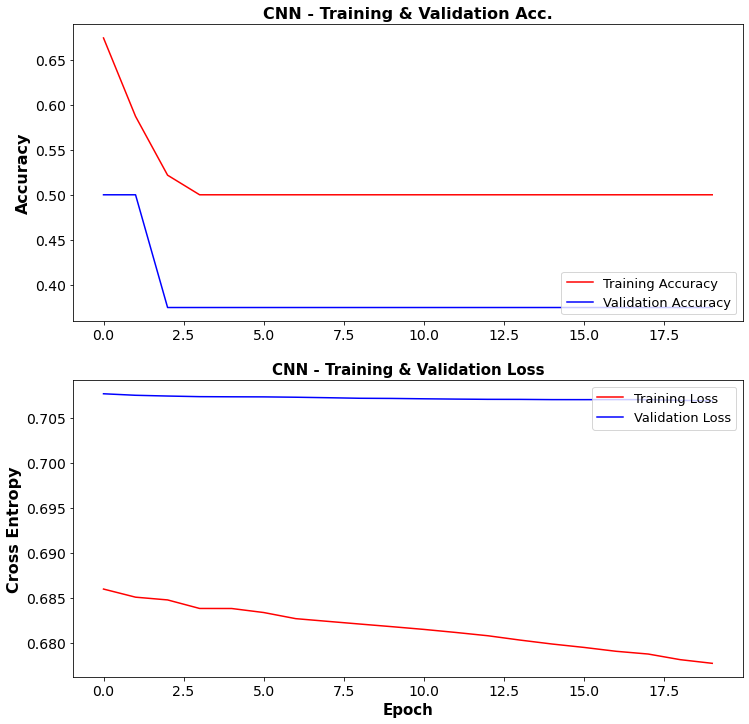

In [28]:
acc = h_cnn.history['accuracy']
val_acc = h_cnn.history['val_accuracy']

loss = h_cnn.history['loss']
val_loss = h_cnn.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('CNN - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('CNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

import tensorflow as tf
from tensorflow import keras
es=tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True
)

In [29]:
from sklearn.metrics import classification_report

Y_pred = model_cnn.predict(x_test)
y_pred = np.round(Y_pred)

print(classification_report(y_test, y_pred))

1/1 [==============================] - 0s 100ms/step
              precision    recall  f1-score   support

           0       0.30      0.19      0.23        16
           1       0.41      0.56      0.47        16

    accuracy                           0.38        32
   macro avg       0.35      0.38      0.35        32
weighted avg       0.35      0.38      0.35        32

